# **TAREA 3**

El presente análisis se desarrolla a partir del conjunto de datos athlete_events, que recopila más de un siglo de historia olímpica. En este ejercicio se examinan específicamente los resultados correspondientes a los Juegos Olímpicos de 2016, con el objetivo de filtrar ganadores de medalla (Gold/Silver/Bronze) del año 2016 en 5 deportes (Athletics, Swimming, Rowing, Football, Hockey) y analizar el patrón global de height y weight, además de un resumen comparativo por tipo de medalla y género mediante visualizaciones.

## **Importe de librerías**

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

## **Carga del dataset**

In [2]:
url = "https://raw.githubusercontent.com/cdeoroaguado/Datos/refs/heads/main/dataviz/athlete_events.csv"
df = pd.read_csv(url)

df.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


In [3]:
df.shape, df.columns

((271116, 15),
 Index(['ID', 'Name', 'Sex', 'Age', 'Height', 'Weight', 'Team', 'NOC', 'Games',
        'Year', 'Season', 'City', 'Sport', 'Event', 'Medal'],
       dtype='object'))

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271116 entries, 0 to 271115
Data columns (total 15 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   ID      271116 non-null  int64  
 1   Name    271116 non-null  object 
 2   Sex     271116 non-null  object 
 3   Age     261642 non-null  float64
 4   Height  210945 non-null  float64
 5   Weight  208241 non-null  float64
 6   Team    271116 non-null  object 
 7   NOC     271116 non-null  object 
 8   Games   271116 non-null  object 
 9   Year    271116 non-null  int64  
 10  Season  271116 non-null  object 
 11  City    271116 non-null  object 
 12  Sport   271116 non-null  object 
 13  Event   271116 non-null  object 
 14  Medal   39783 non-null   object 
dtypes: float64(3), int64(2), object(10)
memory usage: 31.0+ MB


## **Filtrado**

Filtrar el DataFrame para incluir únicamente las filas correspondientes a los ganadores de medallas de 2016 en los deportes mencionados en la descripción de la actividad.

In [9]:
deportes = ["Athletics", "Swimming", "Rowing", "Football", "Hockey"]

olimp_2016 = df[
    (df["Year"] == 2016) &
    (df["Medal"].notna()) &
    (df["Sport"].isin(deportes))
].copy()

olimp_2016.shape

(732, 15)

In [6]:
olimp_2016["Sport"].value_counts()

Sport
Athletics    192
Swimming     191
Rowing       144
Football     106
Hockey        99
Name: count, dtype: int64

## **Observación de la estructura de los datos**

In [12]:
olimp_2016.dtypes


ID          int64
Name       object
Sex        object
Age       float64
Height    float64
Weight    float64
Team       object
NOC        object
Games      object
Year        int64
Season     object
City       object
Sport      object
Event      object
Medal      object
dtype: object

In [22]:
var_cat = df.select_dtypes(include=['object']).copy()
var_num = df.select_dtypes(include=['int64', 'float64']).copy()
print("Variables categóricas:")
print(var_cat.columns)

print("\nVariables numéricas:")
print(var_num.columns)


Variables categóricas:
Index(['Name', 'Sex', 'Team', 'NOC', 'Games', 'Season', 'City', 'Sport',
       'Event', 'Medal'],
      dtype='object')

Variables numéricas:
Index(['ID', 'Age', 'Height', 'Weight', 'Year'], dtype='object')


## **Height & Weight**

Evaluar cuál sería la visualización adecuada para que un patrón global represente las características de height y weight.

In [30]:
#Observar qué filas tienen NaN en el subconjunto olim_2016
olimp_2016.isna().value_counts()
olimp_2016[olimp_2016.isna().any(axis=1)]

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
5028,2861,Nathon Allen,M,20.0,178.0,NaN,Jamaica,JAM,2016 Summer,2016,Summer,Rio de Janeiro,Athletics,Athletics Men's 4 x 400 metres Relay,Silver
64474,33002,Saturday Keigo Erimuya,M,18.0,171.0,NaN,Nigeria,NGR,2016 Summer,2016,Summer,Rio de Janeiro,Football,Football Men's Football,Bronze
93594,47384,Ryan Held,M,21.0,NaN,NaN,United States,USA,2016 Summer,2016,Summer,Rio de Janeiro,Swimming,Swimming Men's 4 x 100 metres Freestyle Relay,Gold
148840,74652,Luvo Manyonga,M,25.0,NaN,NaN,South Africa,RSA,2016 Summer,2016,Summer,Rio de Janeiro,Athletics,Athletics Men's Long Jump,Silver
155042,77819,Omar McLeod,M,22.0,180.0,NaN,Jamaica,JAM,2016 Summer,2016,Summer,Rio de Janeiro,Athletics,Athletics Men's 110 metres Hurdles,Gold
256361,128366,Margaret Nyairera Wambui,F,20.0,NaN,66.0,Kenya,KEN,2016 Summer,2016,Summer,Rio de Janeiro,Athletics,Athletics Women's 800 metres,Bronze


In [33]:
#quedarnos con height/weight válidos
olimp_2016_hw = olimp_2016.dropna(subset=["Height", "Weight"]).copy()
olimp_2016_hw.shape

(726, 15)

c:\Users\danih\miniconda3\envs\dataviz_venv\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\danih\miniconda3\envs\dataviz_venv\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\danih\miniconda3\envs\dataviz_venv\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\danih\miniconda3\envs\dataviz_venv\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future versi

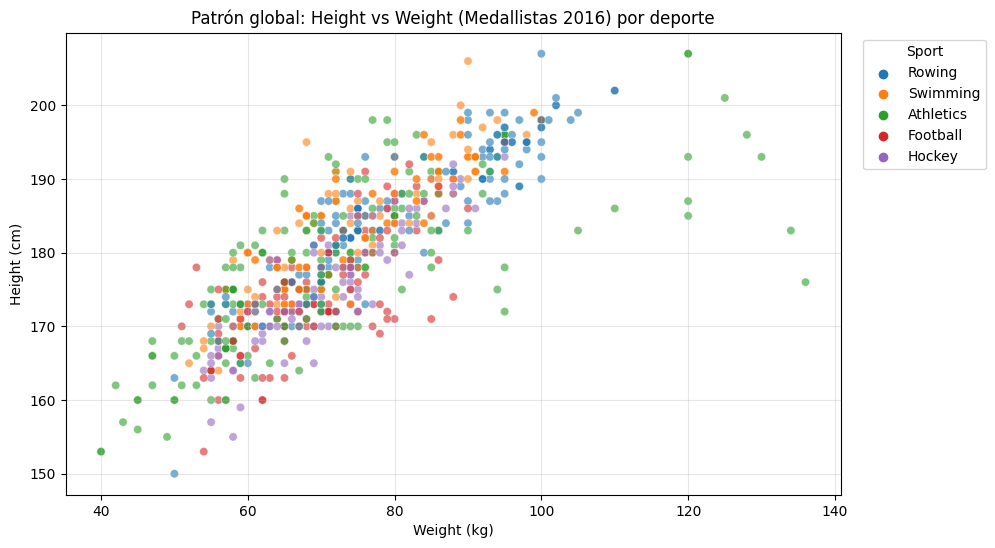

In [34]:
plt.figure(figsize=(10,6))
sns.scatterplot(
    data=olimp_2016_hw,
    x="Weight", y="Height",
    hue="Sport",
    alpha=0.6
)
plt.title("Patrón global: Height vs Weight (Medallistas 2016) por deporte")
plt.xlabel("Weight (kg)")
plt.ylabel("Height (cm)")
plt.legend(title="Sport", bbox_to_anchor=(1.02, 1), loc="upper left")
plt.grid(True, alpha=0.3)
plt.show()

Se seleccionó un diagrama de dispersión debido a que permite analizar simultáneamente la relación entre dos variables numéricas continuas (height y weight), evidenciando patrones globales, dispersión y posibles agrupamientos por deporte. El uso del color facilita la comparación entre disciplinas deportivas, permitiendo identificar perfiles físicos característicos en cada una.

Interpretación: El gráfico de dispersión muestra una clara relación positiva entre el peso y la estatura de los medallistas olímpicos de 2016, evidenciando que, en general, a mayor peso corresponde una mayor altura. Se observan agrupamientos diferenciados por deporte: disciplinas como remo y natación concentran atletas más altos y pesados, mientras que fútbol y hockey presentan perfiles corporales más compactos, con menor peso y estatura promedio. Atletismo exhibe una mayor dispersión, reflejando la diversidad de pruebas dentro de esta disciplina (velocidad, fondo, lanzamientos), lo que genera una mayor variabilidad física. Aunque existe superposición entre deportes, se distinguen tendencias estructurales que sugieren perfiles corporales característicos según la exigencia física de cada disciplina, confirmando que las características antropométricas están fuertemente asociadas al tipo de deporte practicado.

c:\Users\danih\miniconda3\envs\dataviz_venv\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\danih\miniconda3\envs\dataviz_venv\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\danih\miniconda3\envs\dataviz_venv\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\danih\miniconda3\envs\dataviz_venv\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future versi

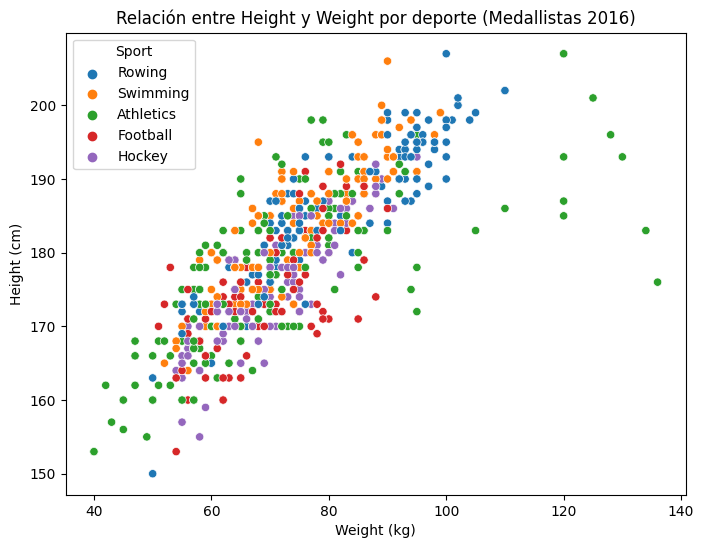

In [ ]:
#MODO PROFESOR
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))

sns.scatterplot(
    data=olimp_2016_hw,
    x="Weight",
    y="Height",
    hue="Sport"
)

plt.title("Relación entre Height y Weight por deporte (Medallistas 2016)")
plt.xlabel("Weight (kg)")
plt.ylabel("Height (cm)")
plt.legend(title="Sport")
plt.show()


## **Height & Weight, por medalla y género**

Evaluar cuál sería la visualización adecuada para representar las estadísticas resumidas de las características de height y weight en función de las medallas, separadas además por género de los atletas.

In [64]:
resumen = (
    olimp_2016_hw
    .groupby(["Sex", "Medal"])[["Height", "Weight"]]
    .agg(["mean", "std", "median", "min", "max"])
)

resumen

Height                                    Weight             \
                  mean       std median    min    max       mean        std   
Sex Medal                                                                     
F   Bronze  173.245614  7.965147  173.0  150.0  193.0  64.491228   8.477190   
    Gold    174.462810  7.852857  174.0  153.0  193.0  66.132231  11.392938   
    Silver  174.193277  7.840872  173.0  153.0  193.0  65.058824  10.014645   
M   Bronze  185.191667  8.968943  185.0  169.0  207.0  81.133333  13.160249   
    Gold    186.870229  8.743698  188.0  167.0  207.0  83.145038  12.790094   
    Silver  185.256198  7.534951  186.0  168.0  202.0  81.033058  12.990980   

                                
           median   min    max  
Sex Medal                       
F   Bronze   64.0  45.0   95.0  
    Gold     65.0  40.0  136.0  
    Silver   65.0  40.0  120.0  
M   Bronze   79.5  51.0  128.0  
    Gold     84.0  55.0  125.0  
    Silver   80.0  47.0  134.0

c:\Users\danih\miniconda3\envs\dataviz_venv\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\danih\miniconda3\envs\dataviz_venv\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\danih\miniconda3\envs\dataviz_venv\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\danih\miniconda3\envs\dataviz_venv\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future versi

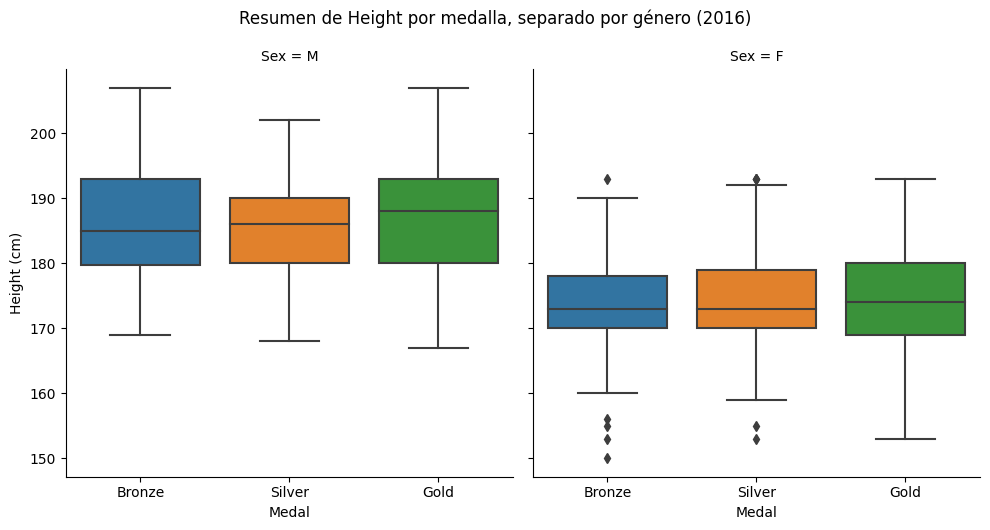

In [38]:
g = sns.catplot(
    data=olimp_2016_hw,
    x="Medal", y="Height",
    col="Sex",
    kind="box",
    height=5, aspect=1
)
g.fig.suptitle("Resumen de Height por medalla, separado por género (2016)", y=1.05)
g.set_axis_labels("Medal", "Height (cm)")
plt.show()

c:\Users\danih\miniconda3\envs\dataviz_venv\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\danih\miniconda3\envs\dataviz_venv\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\danih\miniconda3\envs\dataviz_venv\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\danih\miniconda3\envs\dataviz_venv\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future versi

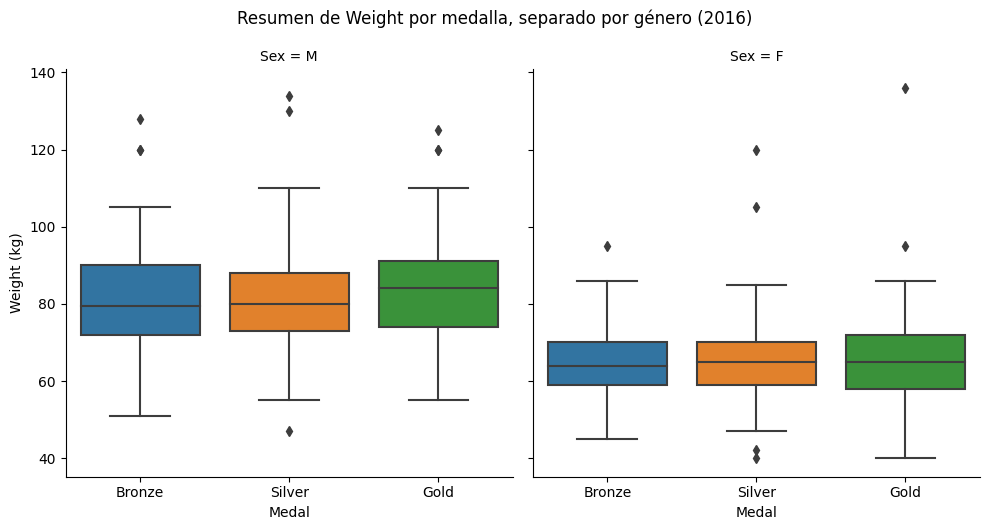

In [39]:
g = sns.catplot(
    data=olimp_2016_hw,
    x="Medal", y="Weight",
    col="Sex",
    kind="box",
    height=5, aspect=1
)
g.fig.suptitle("Resumen de Weight por medalla, separado por género (2016)", y=1.05)
g.set_axis_labels("Medal", "Weight (kg)")
plt.show()

c:\Users\danih\miniconda3\envs\dataviz_venv\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\danih\miniconda3\envs\dataviz_venv\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\danih\miniconda3\envs\dataviz_venv\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\danih\miniconda3\envs\dataviz_venv\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future versi

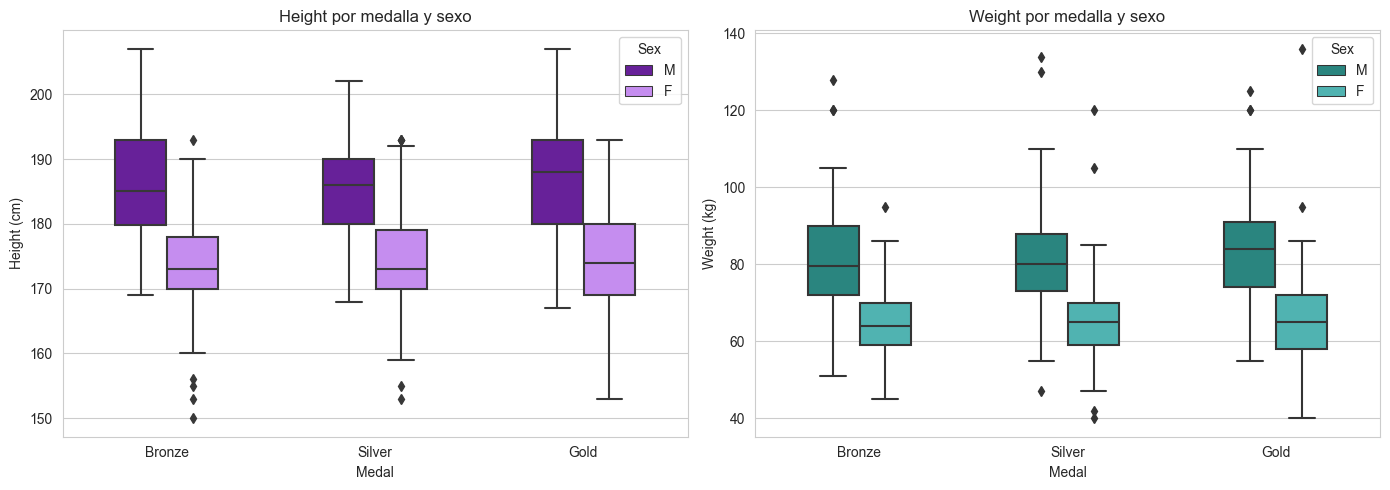

In [63]:
import matplotlib.pyplot as plt
import seaborn as sns

purple_palette = {
    "M": "#6A0DAD",
    "F": "#C77DFF"
}

blue_palette = {
    "M": "#1B948C",
    "F": "#3FC4C1"
}

#purple_palette = sns.color_palette("Purples", 2)
#blue_palette = sns.color_palette("Blues", 2)

fig, axes = plt.subplots(1, 2, figsize=(14, 5), sharex=True)

# Height
sns.boxplot(
    data=olimp_2016_hw,
    x="Medal",
    y="Height",
    hue="Sex",
    palette=purple_palette,
    width=0.5,
    ax=axes[0]
)

axes[0].set_title("Height por medalla y sexo")
axes[0].set_ylabel("Height (cm)")

# Weight
sns.boxplot(
    data=olimp_2016_hw,
    x="Medal",
    y="Weight",
    hue="Sex",
    palette=blue_palette,
    width=0.5,
    ax=axes[1]
)

axes[1].set_title("Weight por medalla y sexo")
axes[1].set_ylabel("Weight (kg)")

# Quitar leyenda duplicada
axes[1].legend(title="Sex")
axes[0].legend(title="Sex")

plt.tight_layout()
plt.show()

Se seleccionó el diagrama de cajas y bigotes (boxplot) porque es la visualización más adecuada cuando el objetivo es representar estadísticas resumidas de variables numéricas continuas en función de categorías. Este tipo de gráfico permite observar de manera simultánea la mediana, el rango intercuartílico, la dispersión y la presencia de valores atípicos, lo cual responde directamente al enunciado que solicita analizar height y weight según el tipo de medalla y separados por género. Además, al incorporar el hue por sexo, se facilita la comparación estructurada entre hombres y mujeres dentro de cada categoría de medalla, permitiendo evaluar diferencias sin perder claridad visual.

Interpretación: el gráfico muestra que los hombres presentan consistentemente mayores valores de estatura y peso que las mujeres en los tres tipos de medalla, reflejando diferencias biológicas estructurales. Se observa una ligera tendencia a que los medallistas de oro, en ambos sexos, tengan medianas de estatura y peso ligeramente superiores respecto a plata y bronce, aunque existe una superposición considerable entre las distribuciones, lo que indica que estas características físicas por sí solas no determinan de forma absoluta el tipo de medalla obtenida. La dispersión es relativamente estable entre categorías, con algunos valores atípicos especialmente en el peso masculino, lo que evidencia variabilidad individual dentro de cada grupo.

In [ ]:


#IGNORARRRRRRRRRRRRRRRRRRRR

df_long = olimp_2016_hw.melt(
    id_vars=["Medal", "Sex"],
    value_vars=["Height", "Weight"],
    var_name="Variable",
    value_name="Valor"
)

# Normalizar por variable (z-score)
df_long["Valor_z"] = df_long.groupby("Variable")["Valor"].transform(
    lambda x: (x - x.mean()) / x.std()
)

plt.figure(figsize=(12,5))
sns.boxplot(data=df_long, x="Medal", y="Valor_z", hue="Sex")
plt.title("Height y Weight combinados (normalizados) por medalla y sexo")
plt.ylabel("Valor (z-score)")
plt.show()